In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data=pd.read_csv('/content/IPL_2023_DATASET.csv')

In [55]:
data.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $
0,0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans,NaN,NaN
1,1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans,NaN,NaN
2,2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans,NaN,NaN
3,3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans,NaN,NaN
4,4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans,NaN,NaN


In [4]:
data.tail()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $
563,563,Dhruv Patel,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
564,564,Jack Prestwidge,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
565,565,Aditya Sarvate,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
566,566,Sagar Solanki,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0
567,567,Prenelan Subrayen,NaN,ALL-ROUNDER,NaN,NaN,NaN,Unsold,2000000.0,24000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       568 non-null    int64  
 1   Player           568 non-null    object 
 2   Base Price       243 non-null    object 
 3   TYPE             568 non-null    object 
 4   COST IN ₹ (CR.)  243 non-null    float64
 5   Cost IN $ (000)  243 non-null    float64
 6   2022 Squad       230 non-null    object 
 7   Team             568 non-null    object 
 8   Base Price IN ₹  325 non-null    float64
 9   Base Price IN $  325 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 44.5+ KB


In [57]:
data.isna().sum()

,0
Unnamed: 0,0
Player,0
Base Price,325
TYPE,0
COST IN ₹ (CR.),325
Cost IN $ (000),325
2022 Squad,338
Team,0
Base Price IN ₹,243
Base Price IN $,243


In [58]:
m1=data['Base Price IN $'].mean()
data['Base Price IN $'].fillna(m1,inplace=True)
data['Base Price IN $'].isna().sum()

0

In [59]:
m2=data['Base Price IN ₹'].mean()
data['Base Price IN ₹'].fillna(m2,inplace=True)
data['Base Price IN ₹'].isna().sum()

0

In [60]:
data.isna().sum()

,0
Unnamed: 0,0
Player,0
Base Price,325
TYPE,0
COST IN ₹ (CR.),325
Cost IN $ (000),325
2022 Squad,338
Team,0
Base Price IN ₹,0
Base Price IN $,0


In [61]:
m3=data['COST IN ₹ (CR.)'].mean()
data['COST IN ₹ (CR.)'].fillna(m3,inplace=True)
data['COST IN ₹ (CR.)'].isna().sum()

0

In [62]:
m4=data['Cost IN $ (000)'].mean()
data['Cost IN $ (000)'].fillna(m4,inplace=True)
data['Cost IN $ (000)'].isna().sum()

0

In [63]:
# Use regular expression to remove non-numeric characters
data['Base Salary Clean'] = data['Base Price'].replace(r'[^0-9]', '', regex=True)

# Convert the cleaned column to numeric
data['Base Salary Clean'] = pd.to_numeric(data['Base Salary Clean'], errors='coerce')


In [64]:
data['Base Salary Clean'].dtype

dtype('float64')

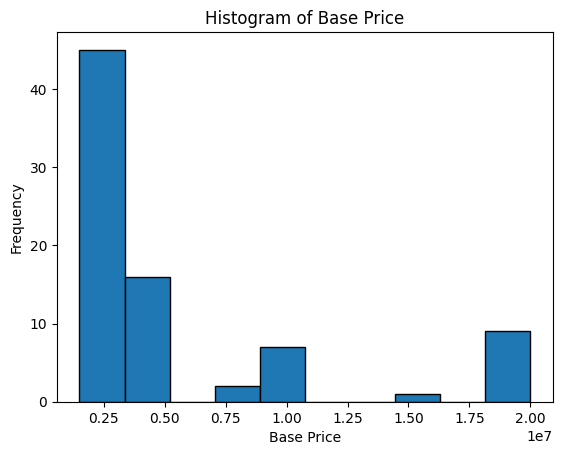

In [66]:


# Plot a histogram
plt.hist(data['Base Salary Clean'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Base Price')
plt.ylabel('Frequency')
plt.title('Histogram of Base Price')

# Display the histogram
plt.show()


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         568 non-null    int64  
 1   Player             568 non-null    object 
 2   TYPE               568 non-null    object 
 3   COST IN ₹ (CR.)    568 non-null    float64
 4   Cost IN $ (000)    568 non-null    float64
 5   2022 Squad         230 non-null    object 
 6   Team               568 non-null    object 
 7   Base Price IN ₹    568 non-null    float64
 8   Base Price IN $    568 non-null    float64
 9   Base Salary Clean  80 non-null     float64
dtypes: float64(5), int64(1), object(4)
memory usage: 44.5+ KB


In [70]:
data['2022 Squad'].fillna('No squad',inplace=True)
data.isna().sum()

,0
Unnamed: 0,0
Player,0
TYPE,0
COST IN ₹ (CR.),0
Cost IN $ (000),0
2022 Squad,0
Team,0
Base Price IN ₹,0
Base Price IN $,0
Base Salary Clean,488


In [79]:
m5=data['Base Salary Clean'].mean()
data['Base Salary Clean'].fillna(m5,inplace=True)

In [89]:
data.drop(columns=['Unnamed: 0'],axis=1)

,Player,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2022 Squad,Team,Base Price IN ₹,Base Price IN $,Base Salary Clean
0,Shivam Mavi,BOWLER,6.000000,720.000000,KKR,Gujarat Titans,3.453846e+06,41446.153846,4000000.0
1,Joshua Little,BOWLER,4.400000,528.000000,No squad,Gujarat Titans,3.453846e+06,41446.153846,5000000.0
2,Kane Williamson,BATSMAN,2.000000,240.000000,SRH,Gujarat Titans,3.453846e+06,41446.153846,20000000.0
3,K.S. Bharat,WICKETKEEPER,1.200000,144.000000,DC,Gujarat Titans,3.453846e+06,41446.153846,2000000.0
4,Mohit Sharma,BOWLER,0.500000,60.000000,No squad,Gujarat Titans,3.453846e+06,41446.153846,5000000.0
...,...,...,...,...,...,...,...,...,...
563,Dhruv Patel,ALL-ROUNDER,0.687243,82.469136,No squad,Unsold,2.000000e+06,24000.000000,5600000.0
564,Jack Prestwidge,ALL-ROUNDER,0.687243,82.469136,No squad,Unsold,2.000000e+06,24000.000000,5600000.0
565,Aditya Sarvate,ALL-ROUNDER,0.687243,82.469136,No squad,Unsold,2.000000e+06,24000.000000,5600000.0
566,Sagar Solanki,ALL-ROUNDER,0.687243,82.469136,No squad,Unsold,2.000000e+06,24000.000000,5600000.0


In [90]:
data.isna().sum()

,0
Unnamed: 0,0
Player,0
TYPE,0
COST IN ₹ (CR.),0
Cost IN $ (000),0
2022 Squad,0
Team,0
Base Price IN ₹,0
Base Price IN $,0
Base Salary Clean,0


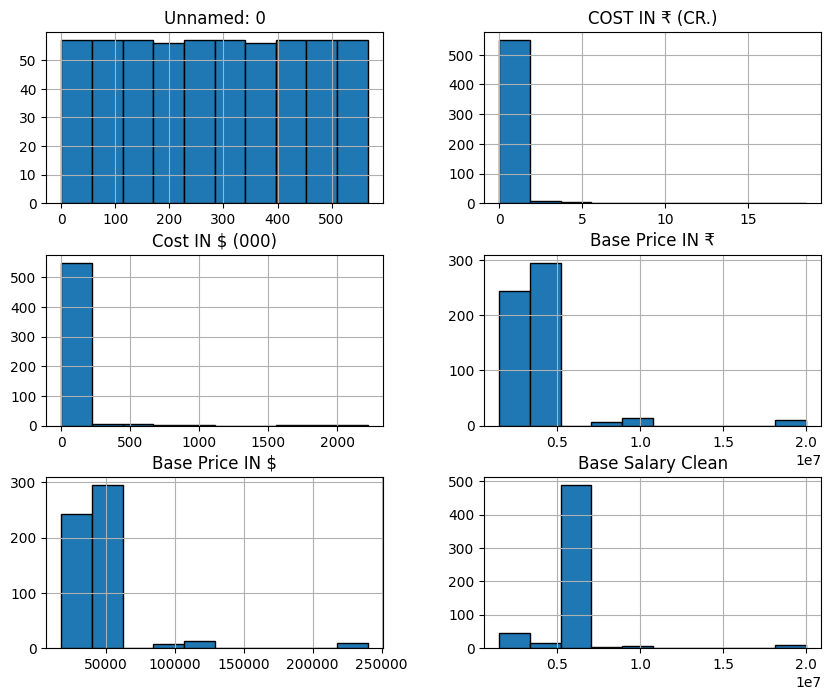

In [92]:
# Plot histograms for all columns in the dataset
data.hist(bins=10, figsize=(10, 8), edgecolor='black')

# Display the plots
plt.show()

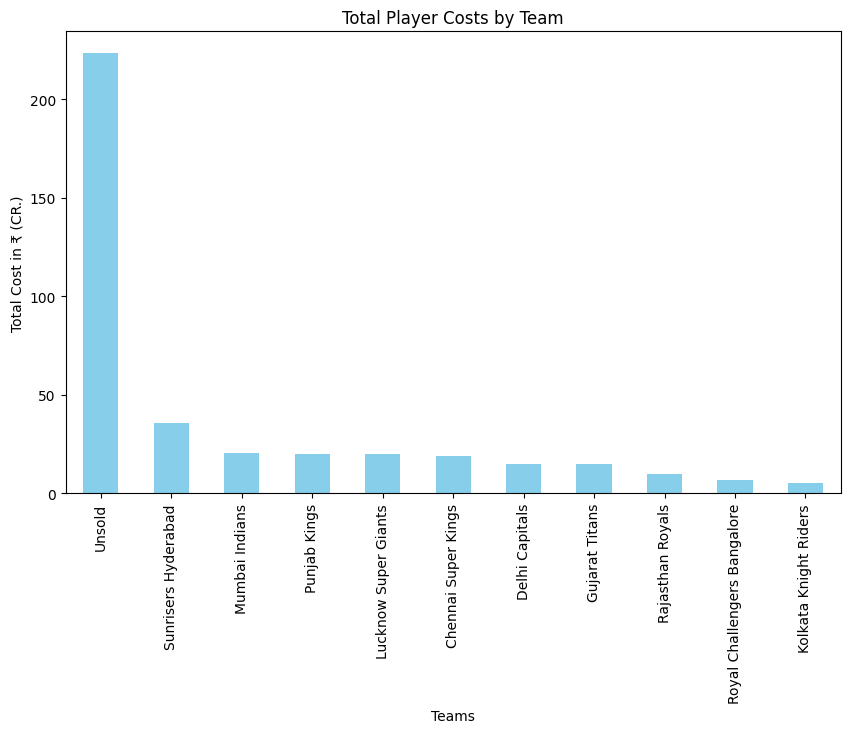

In [94]:
#1.Which team has spent the most on player salaries?

team_costs = data.groupby('Team')['COST IN ₹ (CR.)'].sum().sort_values(ascending=False)
team_costs.plot(kind='bar', figsize=(10, 6), title="Total Player Costs by Team", color='skyblue')
plt.xlabel('Teams')
plt.ylabel('Total Cost in ₹ (CR.)')
plt.show()

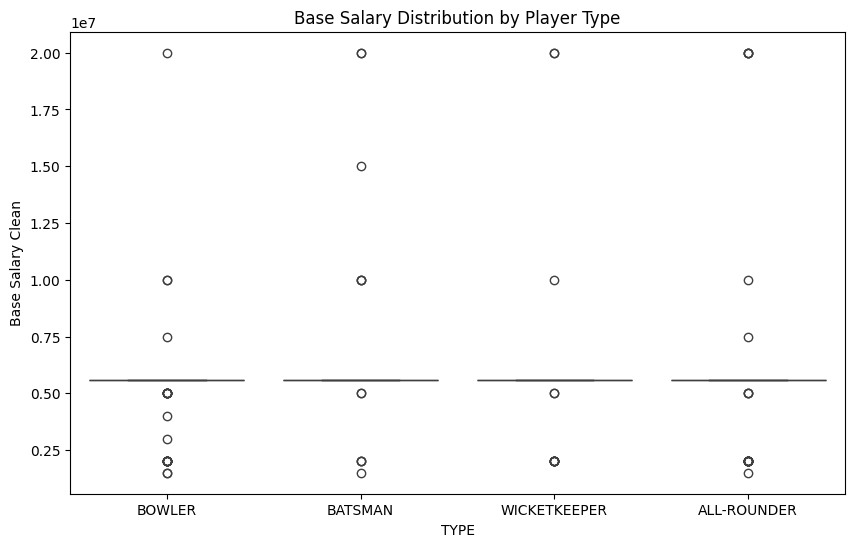

In [96]:
#2.What is the distribution of base salaries for different player types (Bowler, Batsman, All-rounder, etc.)?

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='TYPE', y='Base Salary Clean', data=data)
plt.title('Base Salary Distribution by Player Type')
plt.show()

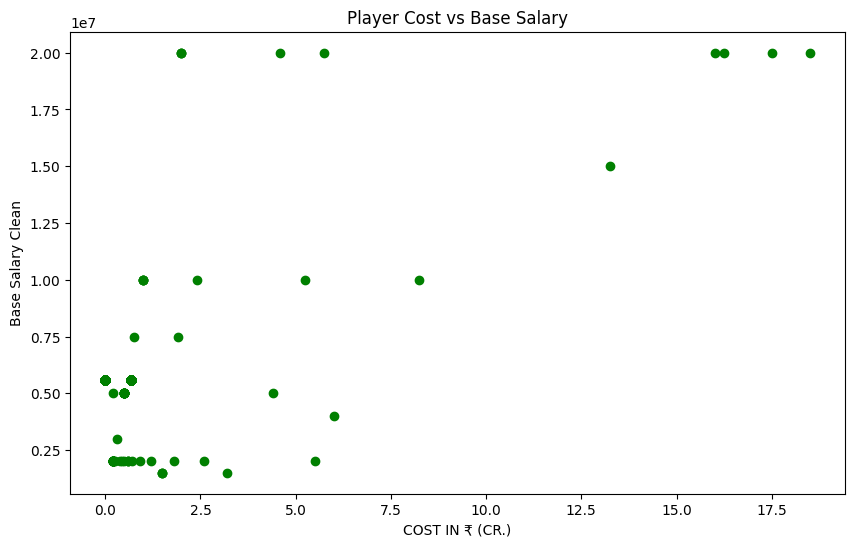

In [97]:
#3.What is the relation between player cost in ₹ and player base price?

plt.figure(figsize=(10, 6))
plt.scatter(data['COST IN ₹ (CR.)'], data['Base Salary Clean'], color='green')
plt.title('Player Cost vs Base Salary')
plt.xlabel('COST IN ₹ (CR.)')
plt.ylabel('Base Salary Clean')
plt.show()


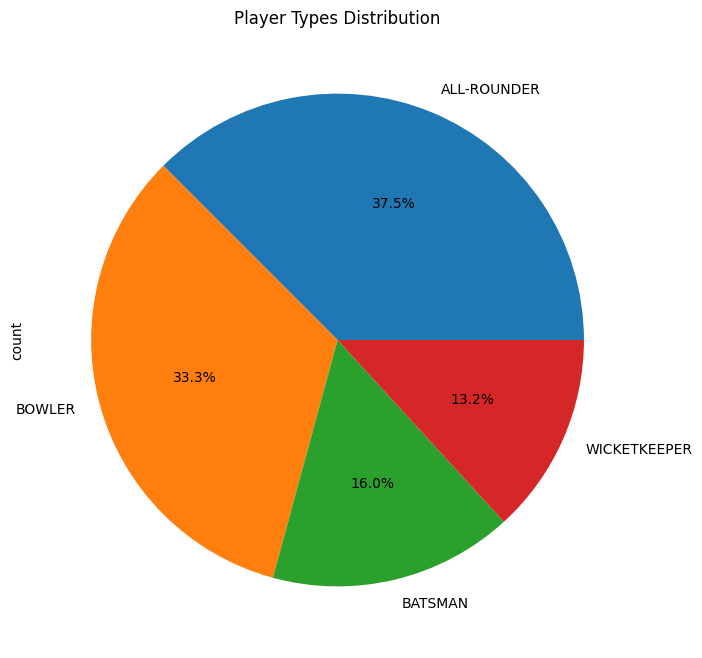

In [99]:
#4.How many players belong to each player type (Bowler, Batsman, etc.)?

player_types = data['TYPE'].value_counts()
player_types.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Player Types Distribution')
plt.show()


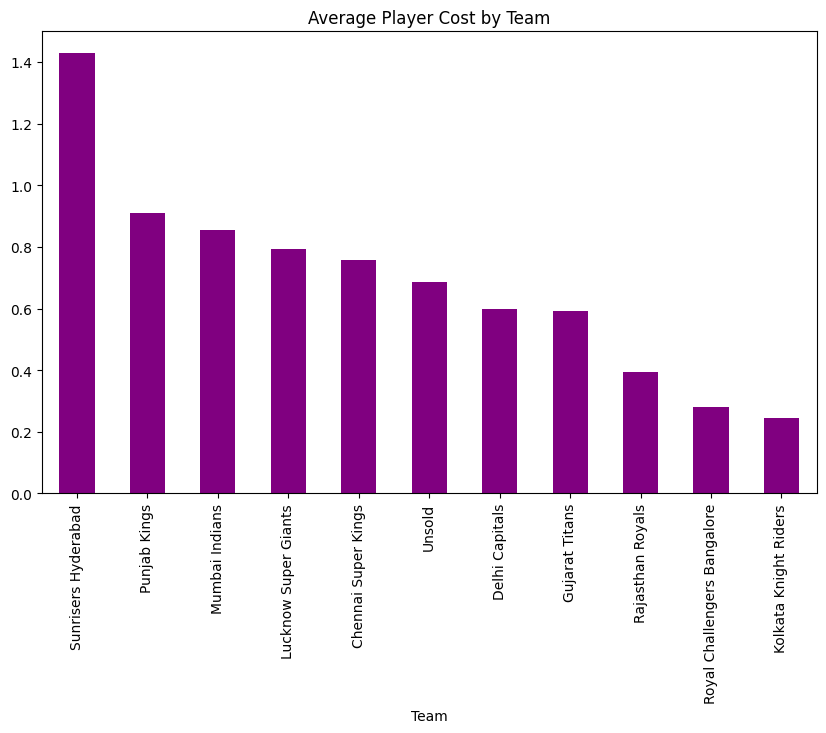

In [102]:
#5.What is the average player cost by team?

avg_cost_per_team = data.groupby('Team')['COST IN ₹ (CR.)'].mean().sort_values(ascending=False)
avg_cost_per_team.plot(kind='bar', color='purple', title='Average Player Cost by Team', figsize=(10, 6))
plt.show()
